Date: Feb 15th, 2017.
This is the Kaggle practice Digit Recognizer. 

The goal is to take an image of a handwritten single digit, and determine what that digit is.
Algorithm used in this practice:

(1)SVM.
(2)Random Forest.
(3)PCA and KNN.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import scale #No need to rescale the pixels for this project
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import svm
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[0:5000,1:]#using 5000 training only to save time
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

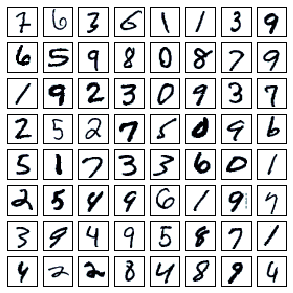

In [16]:
# plot some of the numbers
figure(figsize(5,5))
for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = train_images.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])

In [17]:
#Transform data into binary 
test_images[test_images>0]=1
train_images[train_images>0]=1

/Users/xiaohui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/xiaohui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
#(1)SVM

In [18]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

In [ ]:
#(2)Random Forest

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_images, train_labels)
rf.score(test_images,test_labels)

/Users/xiaohui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.92800000000000005

In [20]:
#Get feature importance:
#Print the feature ranking
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(train_images.shape[1]):
    print("%d. %s (%f)" % (f + 1, train_images.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. pixel409 (0.008891)
2. pixel346 (0.007770)
3. pixel350 (0.007478)
4. pixel318 (0.006987)
5. pixel461 (0.006845)
6. pixel378 (0.006842)
7. pixel347 (0.006716)
8. pixel514 (0.006658)
9. pixel437 (0.006609)
10. pixel489 (0.006539)
11. pixel433 (0.006479)
12. pixel377 (0.006476)
13. pixel515 (0.006428)
14. pixel406 (0.006382)
15. pixel542 (0.006218)
16. pixel405 (0.005829)
17. pixel210 (0.005799)
18. pixel488 (0.005763)
19. pixel291 (0.005757)
20. pixel428 (0.005604)
21. pixel429 (0.005546)
22. pixel263 (0.005430)
23. pixel178 (0.005364)
24. pixel596 (0.005306)
25. pixel460 (0.005257)
26. pixel432 (0.005205)
27. pixel657 (0.005195)
28. pixel462 (0.005173)
29. pixel154 (0.005136)
30. pixel374 (0.005088)
31. pixel541 (0.004896)
32. pixel655 (0.004885)
33. pixel317 (0.004836)
34. pixel211 (0.004829)
35. pixel381 (0.004810)
36. pixel401 (0.004780)
37. pixel345 (0.004739)
38. pixel183 (0.004696)
39. pixel319 (0.004652)
40. pixel654 (0.004646)
41. pixel486 (0.004623)
42. pixe

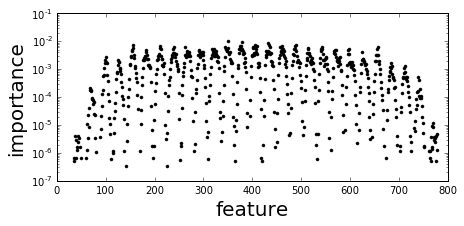

In [11]:
# Plot the feature importances
figure(figsize(7,3))
plot(indices[:],importances[indices[:]],'k.')
yscale("log")
xlabel("feature",size=20)
ylabel("importance",size=20)

It looks like there are no significantly important features (i.e., pixels) in the original data. Next, let us try to decompose the data using a principal component analysis (PCA):

In [ ]:
#3. PCA_KNN

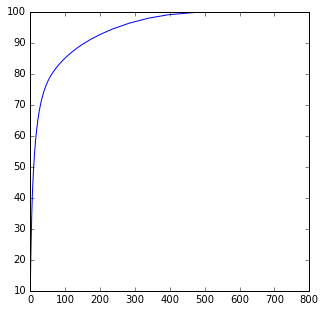

In [21]:
pca=PCA(n_components=784)
pca.fit(train_images)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print var1
plt.plot(var1)

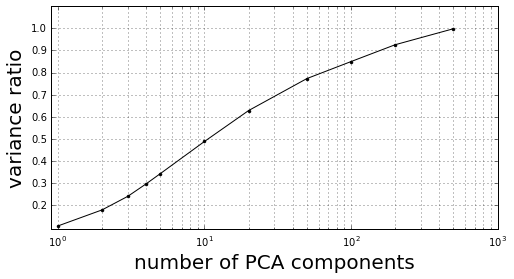

In [22]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train_images)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1 
    
figure(figsize(8,4))
plot(n_components_array,vr,'k.-')
xscale("log")
ylim(9e-2,1.1)
yticks(linspace(0.2,1.0,9))
xlim(0.9)
grid(which="both")
xlabel("number of PCA components",size=20)
ylabel("variance ratio",size=20)

We want to know how much components are needed to capture most of the variance. 
From the plot we see around 403 components capture around 99.82% of total variance. 100 components capture 90% variance.


In [23]:
#Run KNN model
clf = KNeighborsClassifier()
clf.fit(train_images, train_labels)
print clf.score(train_images,train_labels)
print clf.score(test_images,test_labels)

/Users/xiaohui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


0.95625
0.918


In [25]:
#Run KNN model with PCA 100 PC
train_images_T=pca.transform(train_images)
test_images_T=pca.transform(test_images)
clf.fit(train_images_T, train_labels)
print clf.score(train_images_T,train_labels)
print clf.score(test_images_T,test_labels)

/Users/xiaohui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.95575
0.919


In [ ]:
#Prepare submission files
test_data=pd.read_csv('test.csv')
test_data[test_data>0]=1
results_rf=rf.predict(test_data)
df = pd.DataFrame(results_rf)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results_rf.csv', header=True)

In [ ]:
results_knn=clf.predict(test_data)
df = pd.DataFrame(results_knn)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results_knn.csv', header=True)